In [1]:
import os
from glob import glob 

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_paths = glob("../dataset/cifar/train/*.png")
data_paths

['../dataset/cifar/train\\0_frog.png',
 '../dataset/cifar/train\\10000_automobile.png',
 '../dataset/cifar/train\\10001_frog.png',
 '../dataset/cifar/train\\10002_frog.png',
 '../dataset/cifar/train\\10003_ship.png',
 '../dataset/cifar/train\\10004_ship.png',
 '../dataset/cifar/train\\10005_cat.png',
 '../dataset/cifar/train\\10006_deer.png',
 '../dataset/cifar/train\\10007_frog.png',
 '../dataset/cifar/train\\10008_airplane.png',
 '../dataset/cifar/train\\10009_frog.png',
 '../dataset/cifar/train\\1000_truck.png',
 '../dataset/cifar/train\\10010_airplane.png',
 '../dataset/cifar/train\\10011_cat.png',
 '../dataset/cifar/train\\10012_frog.png',
 '../dataset/cifar/train\\10013_frog.png',
 '../dataset/cifar/train\\10014_dog.png',
 '../dataset/cifar/train\\10015_deer.png',
 '../dataset/cifar/train\\10016_ship.png',
 '../dataset/cifar/train\\10017_cat.png',
 '../dataset/cifar/train\\10018_bird.png',
 '../dataset/cifar/train\\10019_frog.png',
 '../dataset/cifar/train\\1001_deer.png',
 '../d

In [3]:
path = data_paths[0]
path

'../dataset/cifar/train\\0_frog.png'

In [4]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)
    return image

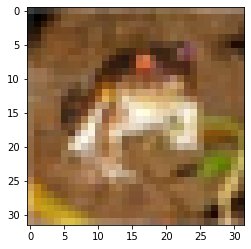

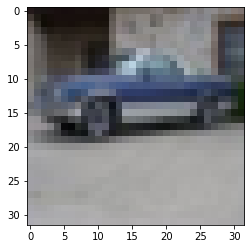

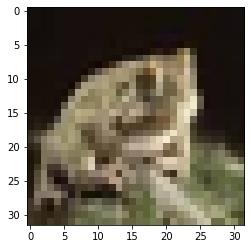

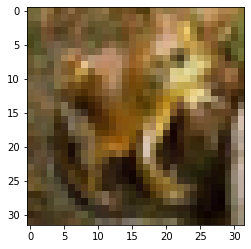

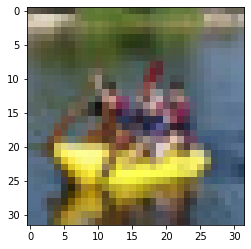

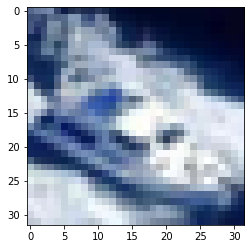

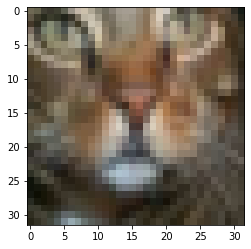

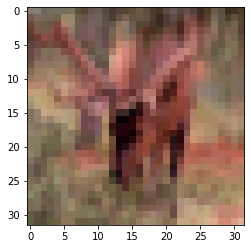

In [5]:
for i in range(8):
    plt.imshow(read_image(data_paths[i]))
    plt.show()

# Batch

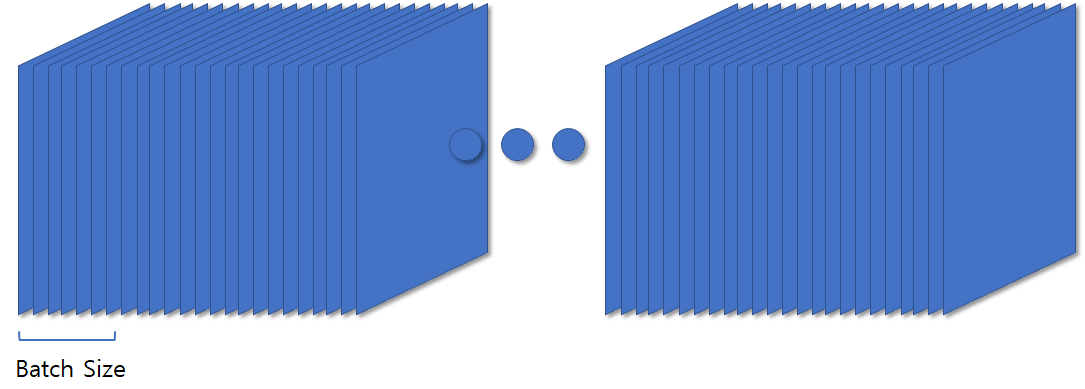

## Images in List

In [6]:
import cv2 as cv

In [7]:
batch_images = []

for path in data_paths[:8]:
    image = read_image(path)
    image = cv.resize(np.asarray(image), (32,32))
    batch_images.append(image)

In [8]:
len(batch_images)

8

In [9]:
batch_images = np.array(batch_images)
batch_images.shape

(8, 32, 32, 3)

In [10]:
batch = tf.convert_to_tensor(batch_images)
batch.shape

TensorShape([8, 32, 32, 3])

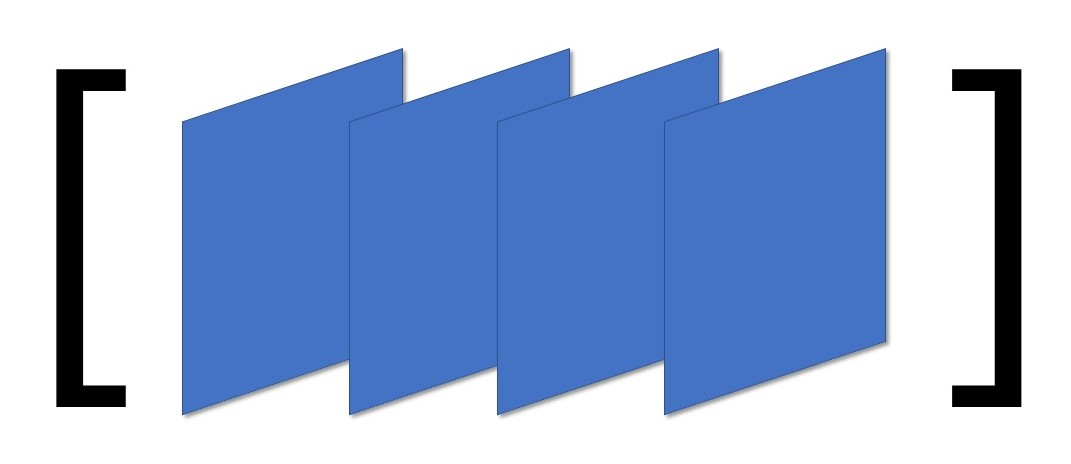

# Batch Size
- batch_size, height, width, channel

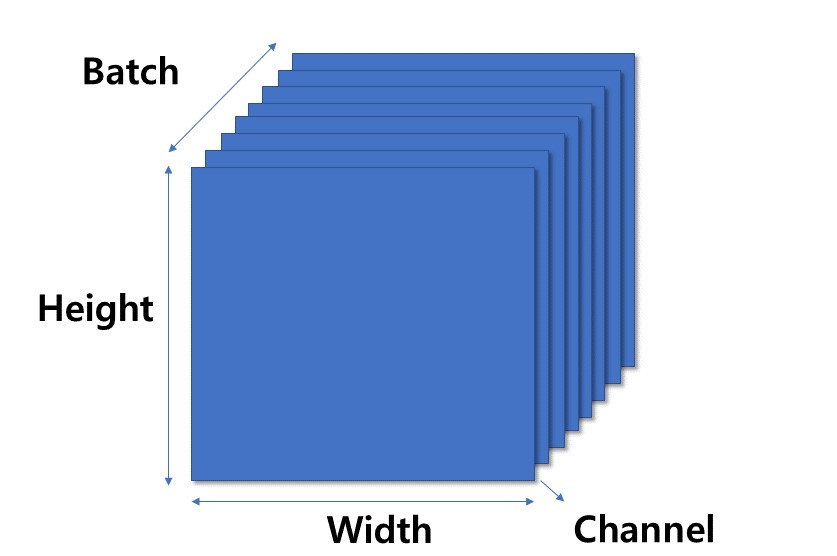

In [24]:
def make_batch(batch_paths):
    batch_images = []

    for path in batch_paths:
        image = read_image(path)
        batch_images.append(image)
    batch_images = np.array(batch_images)
    print(batch_images.shape)

    return batch_images

(6000, 32, 32, 3)


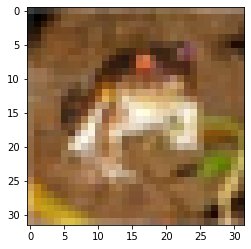

(6000, 32, 32, 3)


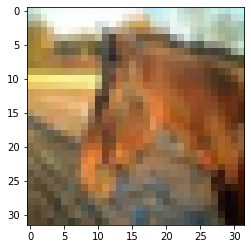

(6000, 32, 32, 3)


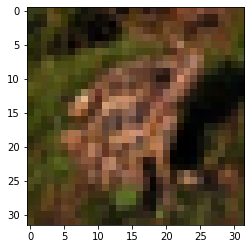

(6000, 32, 32, 3)


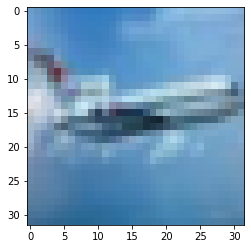

(6000, 32, 32, 3)


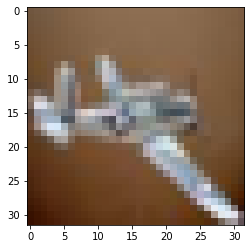

(6000, 32, 32, 3)


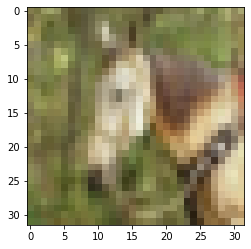

(6000, 32, 32, 3)


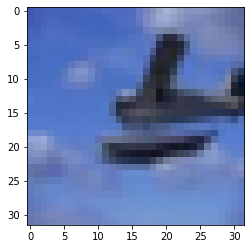

(6000, 32, 32, 3)


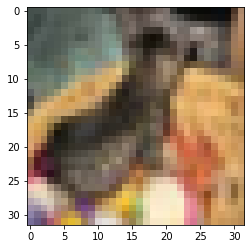

In [25]:
batch_size = 6000
for step in range(len(data_paths)//batch_size):
    batch_images = make_batch(data_paths[step * batch_size : (step+1) * batch_size])
    plt.imshow(batch_images[0])
    plt.show()